In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
%tensorflow_version 2.x

In [ ]:
!pip install efficientnet

In [3]:
import os
import sys
#import efficientnet.keras as efn 

In [4]:
# Machine Learning
import tensorflow as tf
import keras
from keras import initializers
from keras import regularizers
from keras import constraints
from keras import backend as K
from keras.activations import elu
from keras.optimizers import Adam
from keras.models import Sequential
from keras.engine import Layer, InputSpec
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Conv2D, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import cohen_kappa_score

Using TensorFlow backend.


In [5]:
# Standard dependencies
import cv2
import time
import scipy as sp
import numpy as np
import random as rn
import pandas as pd
from tqdm import tqdm
from PIL import Image
from functools import partial
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/APTOS1/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/APTOS1/test.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()

(3662, 2)
(1928, 1)


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
from PIL import Image

def resize(image_pil, width, height):

    ratio_w = width / image_pil.width
    ratio_h = height / image_pil.height
    if ratio_w < ratio_h:

        resize_width = width
        resize_height = round(ratio_w * image_pil.height)
    else:

        resize_width = round(ratio_h * image_pil.width)
        resize_height = height
    image_resize = image_pil.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (width, height), (0, 0, 0, 0)) #fondo negro o blanco
    offset = (round((width - resize_width) / 2), round((height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [ ]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
N = train_df.shape[0]
x_train = np.zeros((N, 224, 224, 7), dtype=float)


for i, image_id in enumerate(tqdm(train_df['id_code'])):
  img = Image.open(f'/content/gdrive/My Drive/APTOS1/train_images/{image_id}.png')
  img= resize(img,224,224)
  imga=np.array(img) 
  imga1 = imga/255.

##imga 3 canales
  kernel = np.ones((5,5),np.uint8)
  dilation = cv2.dilate(imga,kernel,iterations = 1)
  dilation1 = dilation/255.
## dilatacion 3 canales
  gray = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
  grayp = gray/255
## gray 1 canal
  gray1 = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray1, 20, 30)
  edges1 = edges/255.
#edges 1 canal
  gray2 = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
  equ = cv2.equalizeHist(gray2)

  equ1 =equ/255.
## ecualizado 1 canal

  image = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)
  image = crop_image_from_gray(image)
  pilimage =Image.fromarray(image)
  image =resize(pilimage,224,224)
  image=np.array(image)
  image = cv2.addWeighted (np.array(image),4, cv2.GaussianBlur(image, (0,0) ,10), -4, 128)
  image1 = image/255.
### 3 canales blur

  x_train[i,:,:,:3] = dilation1
  x_train[i,:,:,3:6] = image1
  x_train[i,:,:,6:7] = np.reshape(edges1,(224, 224, 1))
  #x_train[i,:,:,7:8] = np.reshape(grayp,(224, 224, 1)) 
  #x_train[i,:,:,8:9] = np.reshape(equ1,(224, 224, 1))
  #x_train[i,:,:,9:] = image1

100%|██████████| 3662/3662 [19:27<00:00,  3.14it/s]


In [ ]:
from numpy import save

save('/content/gdrive/My Drive/APTOS1/x_trainp.npy', x_train)

In [ ]:
from numpy import load
x_train = load('/content/gdrive/My Drive/APTOS1/x_trainp.npy')

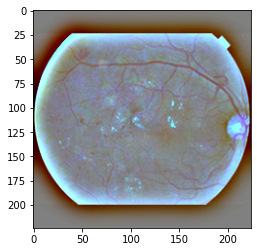

In [ ]:
plt.imshow(x_train[0,:,:,3:6],cmap='gray')

In [ ]:
im[:,:,6:7].shape

(224, 224, 1)

In [ ]:
np.reshape(grayp,(224, 224, 1))

In [ ]:
im[:,:,:3] = imga1
im[:,:,3:6] = dilation1
im[:,:,6:7] = np.reshape(grayp,(224, 224, 1))
im[:,:,7:8] = np.reshape(edges1,(224, 224, 1))
im[:,:,8:9] = np.reshape(equ1,(224, 224, 1))
im[:,:,9:] = image1

In [ ]:
img = Image.open('/content/gdrive/My Drive/APTOS1/train_images/000c1434d8d7.png')


In [ ]:
img= resize(img,224,224)

In [ ]:
imga=np.array(img) 

In [ ]:
imga.shape

(224, 224, 3)

In [ ]:
import cv2

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

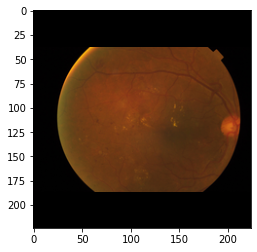

In [ ]:
plt.imshow(imga/255.)

In [ ]:
orb = cv2.ORB_create(nfeatures=500)

In [ ]:
keypoints_orb, descriptors = orb.detectAndCompute(imga, None)

In [ ]:
imgx = cv2.drawKeypoints(imga, keypoints_orb, None)

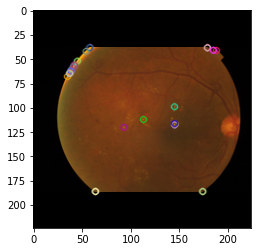

In [ ]:
plt.imshow(imgx)

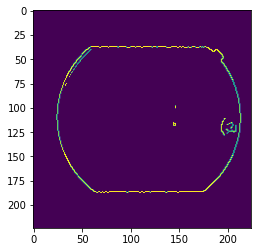

In [ ]:
gray = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 20, 30)
# Using the Canny filter with different parameters
edges_high_thresh = cv2.Canny(gray, 60, 120)

plt.imshow(edges_high_thresh)



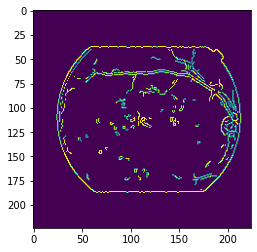

In [ ]:
plt.imshow(edges/255.)

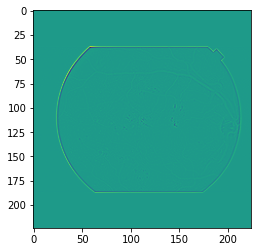

In [ ]:
gray = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray,cv2.CV_64F)
plt.imshow(laplacian)

In [ ]:
kernel = np.ones((5,5),np.uint8)

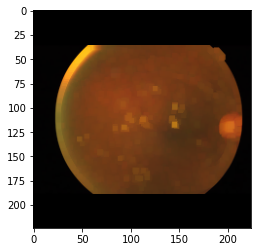

In [ ]:
dilation = cv2.dilate(imga,kernel,iterations = 1)
plt.imshow(dilation)

In [ ]:
dilation[40]/255.

array([[0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.01176471, 0.00784314, 0.00784314],
       [0.

In [ ]:
dilation.shape

(224, 224, 3)

In [ ]:
def crop_image_from_gray(img, tol=7):
 
    # If for some reason we only have two channels
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    # If we have a normal RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

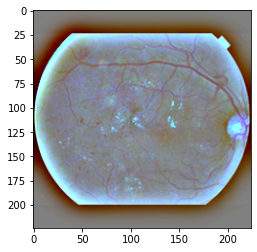

In [ ]:
image = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)
image = crop_image_from_gray(image)
pilimage =Image.fromarray(image)
image =resize(pilimage,224,224)
image=np.array(image)
image = cv2.addWeighted (np.array(image),4, cv2.GaussianBlur(image, (0,0) ,10), -4, 128)
plt.imshow(image)

In [ ]:
image.shape

(224, 224, 3)

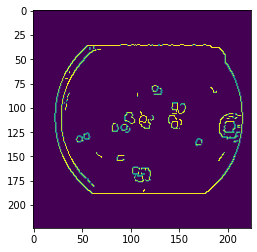

In [ ]:
gray = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 20, 30)
plt.imshow(edges)

In [ ]:
edges[40]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
       255,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,
         0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
edges.shape

(224, 224)

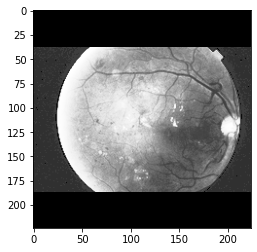

In [ ]:
gray = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)
plt.imshow(equ,cmap='gray')


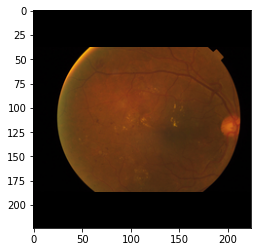

In [ ]:
plt.imshow(imga)

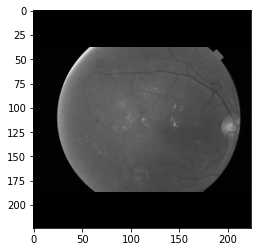

In [ ]:

gray = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

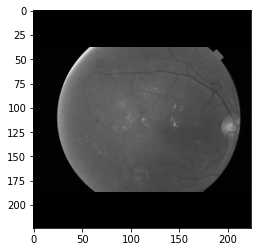

In [ ]:
plt.imshow(gray/255.,cmap='gray')

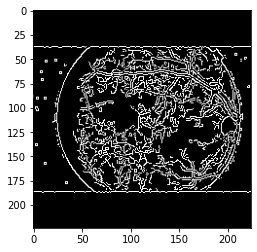

In [ ]:
gray_im = cv2.cvtColor(imga, cv2.COLOR_BGR2GRAY)
gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
gray_equ = cv2.equalizeHist(gray_im)

edges = cv2.Canny(gray_equ, 60, 120)




plt.imshow(edges,cmap='gray')

In [ ]:
N = train_df.shape[0]
x_train = np.empty((N, 224, 224, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(train_df['id_code'])):
    x_train[i, :, :, :] = preprocess_image(
        f'/content/gdrive/My Drive/APTOS1/train_images/{image_id}.png'
    )

In [ ]:
SAVED_MODEL_NAME = 'effnet_modelB5.h5'

In [ ]:
def get_preds_and_labels(model, generator):

    preds = []
    labels = []
    for _ in range(int(64)):
        x, y = next(generator)
        preds.append(model.predict(x))
        labels.append(y)
    # Flatten list of numpy arrays
    return np.concatenate(preds).ravel(), np.concatenate(labels).ravel()

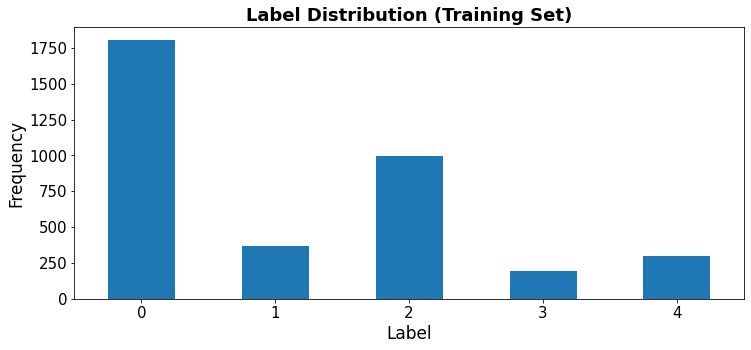

In [ ]:
# Label distribution
train_df['diagnosis'].value_counts().sort_index().plot(kind="bar", 
                                                       figsize=(12,5), 
                                                       rot=0)
plt.title("Label Distribution (Training Set)", 
          weight='bold', 
          fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Label", fontsize=17)
plt.ylabel("Frequency", fontsize=17);

In [ ]:
def crop_image_from_gray(img, tol=7):


    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
 
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

In [ ]:
def preprocess_image(image, sigmaX=10):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (224, 224))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image

In [ ]:
TRAIN_IMG_PATH = '/content/gdrive/My Drive/APTOS1/train_images/'

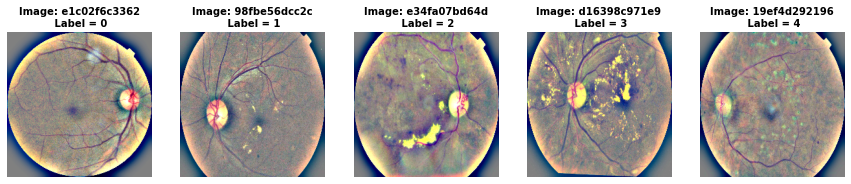

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))
for i in range(5):
    sample = train_df[train_df['diagnosis'] == i].sample(1)
    image_name = sample['id_code'].item()
    X = preprocess_image(cv2.imread(f"{TRAIN_IMG_PATH}{image_name}.png"))
    ax[i].set_title(f"Image: {image_name}\n Label = {sample['diagnosis'].item()}", 
                    weight='bold', fontsize=10)
    ax[i].axis('off')
    ax[i].imshow(X);

In [ ]:
from numpy import load

x_train = load('/content/gdrive/My Drive/APTOS1/x_train.npy')
x_test = load('/content/gdrive/My Drive/APTOS1/x_test.npy')
y_train = pd.get_dummies(train_df['diagnosis']).values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.15, 
    random_state=2020
)

NameError: ignored

In [ ]:
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
                                   rotation_range=360,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   preprocessing_function= preprocess_image, 
                                   rescale=1 / 255.)

test_datagen = ImageDataGenerator( horizontal_flip=True,
                                   vertical_flip=True,
                                   preprocessing_function= preprocess_image, 
                                   rescale=1 / 255.)

tdata_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE, seed=2020)
vdata_generator = test_datagen.flow(x_val, y_val, batch_size=BATCH_SIZE, seed=2020)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1 0 0 0 0]


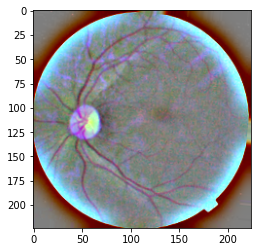

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(tdata_generator[0][0][0])

print(tdata_generator[0][1][0])

In [ ]:
densenet = tf.keras.applications.DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

In [ ]:
model = tf.keras.Sequential()
model.add(densenet)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'Adam',metrics=['accuracy'])

In [ ]:
class QWKEvaluation(Callback):
    def __init__(self, validation_data, batch_size=32, interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.batch_size = batch_size
        self.y_vals = validation_data
        self.history = []

    def on_epoch_end(self, epoch, logs={}):
        X_val = self.y_vals[0]
        y_val = self.y_vals[1]

        if epoch % self.interval == 0:
            y_pred = self.model.predict(X_val,verbose = 1)

            def flatten(y):
                return np.argmax(y, axis=1).reshape(-1)
            
            score = cohen_kappa_score(flatten(y_val),
                                      flatten(y_pred),
                                      labels=[0,1,2,3,4],
                                      weights='quadratic')
            print("\n epoch: %d - QWK_score: %.6f \n" % (epoch+1, score))
            self.history.append(score)
            if score >= max(self.history):
                print('saving checkpoint: ', score)
                self.model.save('densenet_bestqwk.h5')

qwk = QWKEvaluation(validation_data=(x_val1, y_val),
                    batch_size=128, interval=1)

In [ ]:
x_val.shape

(550, 224, 224, 3)

In [ ]:
x_val1 = np.zeros((550, 224, 224, 3),dtype=float)
for i in range(len(x_val)):
  x_val1[i]=preprocess_image(x_val[i])

In [ ]:
x_val1 = x_val1/255.

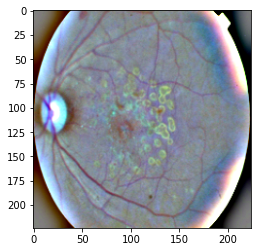

In [ ]:
plt.imshow(x_val1[1])

In [ ]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

In [ ]:
class Metrics(Callback):
    def __init__(self):
        super(Callback, self).__init__()

        
        self.val_kappas = []

    def on_epoch_end(self, epoch, logs={}):
 
        # Get predictions and convert to integers
        y_pred, labels = get_preds_and_labels(model, vdata_generator)
        y_pred = np.rint(y_pred).astype(np.uint8).clip(0, 4)
        # We can use sklearns implementation of QWK straight out of the box
        # as long as we specify weights as 'quadratic'
        _val_kappa = cohen_kappa_score(labels, y_pred, weights='quadratic')
        self.val_kappas.append(_val_kappa)
        print(f"val_kappa: {round(_val_kappa, 4)}")
        if _val_kappa == max(self.val_kappas):
            print("Validacion Kappa ha mejorado, Guardando modelo.")
            self.model.save('densenet_bestqwk.h5')

In [ ]:
model.fit(tdata_generator,batch_size=64, epochs=10, validation_data=(x_val1,y_val),callbacks=[qwk])

Epoch 1/10
18/18 [==============================] - 1s 48ms/step

 epoch: 1 - QWK_score: 0.724970 

49/49 [==============================] - 50s 1s/step - loss: 0.1072 - accuracy: 0.9640 - val_loss: 3.8242 - val_accuracy: 0.7091
Epoch 2/10
18/18 [==============================] - 1s 48ms/step

 epoch: 2 - QWK_score: 0.186971 

49/49 [==============================] - 50s 1s/step - loss: 0.0997 - accuracy: 0.9647 - val_loss: 34.6529 - val_accuracy: 0.5527
Epoch 3/10
18/18 [==============================] - 1s 49ms/step

 epoch: 3 - QWK_score: 0.735211 

49/49 [==============================] - 50s 1s/step - loss: 0.0875 - accuracy: 0.9692 - val_loss: 3.5765 - val_accuracy: 0.6782
Epoch 4/10
18/18 [==============================] - 1s 48ms/step

 epoch: 4 - QWK_score: 0.830446 

49/49 [==============================] - 50s 1s/step - loss: 0.0994 - accuracy: 0.9656 - val_loss: 1.4344 - val_accuracy: 0.7691
Epoch 5/10
18/18 [==============================] - 1s 48ms/step

 epoch: 5 - QWK_s

para los datos con 12 canales

In [ ]:
y_train = pd.get_dummies(train_df['diagnosis']).values

In [ ]:
x_train.shape

(3662, 224, 224, 7)

In [ ]:
y_train.shape

(3662, 5)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.15, 
    random_state=2020
)

In [ ]:
x_train.shape

(3112, 224, 224, 7)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation

In [ ]:
model1 = tf.keras.Sequential()

model1.add(Conv2D(64, (3, 3), padding='same', input_shape=(224,224,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(512, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(728, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(1024))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(5, activation='softmax'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_14 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_15 (Activation)   (None, 112, 112, 128)     0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   brightness_range=[0.5, 1.5])



#Usar el generador original
data_generator = train_datagen.flow(x_train[:,:,:,:3], y_train, batch_size=BATCH_SIZE, seed=2020)

test_datagen = ImageDataGenerator( 
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

vdata_gen =  test_datagen.flow(x_val[:,:,:,:3], y_val, batch_size=BATCH_SIZE, seed=2020)

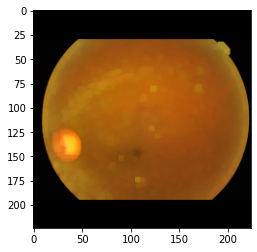

In [ ]:
plt.imshow(x_val[2,:,:,:3])

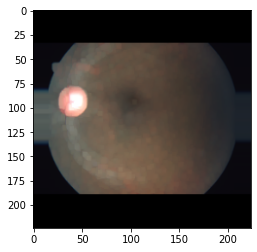

In [ ]:
plt.imshow(vdata_gen[0][0][0])

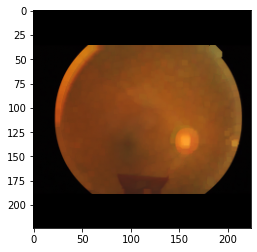

In [ ]:
plt.imshow(x_train[1,:,:,:3])

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer= 'Adam',metrics=['accuracy'])

In [ ]:
model1.fit(data_generator,batch_size=16, epochs=30, validation_data=vdata_gen,callbacks=[])

Epoch 1/30
195/195 [==============================] - 43s 222ms/step - loss: 1.3010 - accuracy: 0.5164 - val_loss: 1.1731 - val_accuracy: 0.5818
Epoch 2/30
195/195 [==============================] - 47s 239ms/step - loss: 1.0316 - accuracy: 0.6404 - val_loss: 1.1342 - val_accuracy: 0.5655
Epoch 3/30
195/195 [==============================] - 47s 241ms/step - loss: 0.9535 - accuracy: 0.6713 - val_loss: 1.0073 - val_accuracy: 0.6309
Epoch 4/30
195/195 [==============================] - 48s 247ms/step - loss: 0.9495 - accuracy: 0.6665 - val_loss: 1.1250 - val_accuracy: 0.5564
Epoch 5/30
195/195 [==============================] - 48s 246ms/step - loss: 0.9197 - accuracy: 0.6844 - val_loss: 1.1651 - val_accuracy: 0.5509
Epoch 6/30
195/195 [==============================] - 47s 242ms/step - loss: 0.8953 - accuracy: 0.6844 - val_loss: 0.8910 - val_accuracy: 0.6836
Epoch 7/30
195/195 [==============================] - 48s 244ms/step - loss: 0.8796 - accuracy: 0.6877 - val_loss: 1.0056 - val_ac

In [ ]:
model1.fit(x=x_train, y=y_train,batch_size=16, epochs=30, validation_data=(x_val,y_val),callbacks=[])

Epoch 1/30
195/195 [==============================] - 12s 61ms/step - loss: 1.0835 - accuracy: 0.5945 - val_loss: 0.8048 - val_accuracy: 0.7345
Epoch 2/30
195/195 [==============================] - 11s 56ms/step - loss: 0.8894 - accuracy: 0.6925 - val_loss: 0.8238 - val_accuracy: 0.7000
Epoch 3/30
195/195 [==============================] - 11s 56ms/step - loss: 0.8352 - accuracy: 0.7008 - val_loss: 0.7258 - val_accuracy: 0.7545
Epoch 4/30
195/195 [==============================] - 10s 53ms/step - loss: 0.8105 - accuracy: 0.7031 - val_loss: 0.7544 - val_accuracy: 0.7509
Epoch 5/30
195/195 [==============================] - 10s 52ms/step - loss: 0.7993 - accuracy: 0.7121 - val_loss: 0.8041 - val_accuracy: 0.7018
Epoch 6/30
195/195 [==============================] - 10s 54ms/step - loss: 0.8063 - accuracy: 0.7079 - val_loss: 0.7517 - val_accuracy: 0.7436
Epoch 7/30
195/195 [==============================] - 10s 52ms/step - loss: 0.7661 - accuracy: 0.7169 - val_loss: 0.7337 - val_accuracy:

In [6]:
train_df = pd.read_csv('trainLabels.csv')

In [7]:
train_df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [8]:
train_df.info()

<bound method DataFrame.info of              image  level
0          10_left      0
1         10_right      0
2          13_left      0
3         13_right      0
4          15_left      1
...            ...    ...
35121  44347_right      0
35122   44348_left      0
35123  44348_right      0
35124   44349_left      0
35125  44349_right      1

[35126 rows x 2 columns]>

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('a. IDRiD_Disease Grading_Training Labels.csv')

In [11]:
train_df['Retinopathy grade']

0      3
1      3
2      2
3      3
4      4
      ..
408    2
409    2
410    2
411    2
412    2
Name: Retinopathy grade, Length: 413, dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Image name              413 non-null    object 
 1   Retinopathy grade       413 non-null    int64  
 2   Risk of macular edema   413 non-null    int64  
 3   Unnamed: 3              0 non-null      float64
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             1 non-null      object 
dtypes: float64(8), int64(2), object(2)
memory usage: 38.8+ KB


In [12]:
test_df = pd.read_csv('b. IDRiD_Disease Grading_Testing Labels.csv')

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              103 non-null    object
 1   Retinopathy grade       103 non-null    int64 
 2   Risk of macular edema   103 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [14]:
test_df['Retinopathy grade']

0      4
1      4
2      4
3      4
4      4
      ..
98     0
99     2
100    1
101    2
102    0
Name: Retinopathy grade, Length: 103, dtype: int64

In [16]:
train_df2 = pd.read_excel('Annotation_Base11.xls')

In [20]:
train_df2.head(100)

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051019_38557_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1
1,20051020_43808_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
2,20051020_43832_0100_PP.tif,Service Ophtalmologie Lariboisière,1,0
3,20051020_43882_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0
4,20051020_43906_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
...,...,...,...,...
95,20051021_40377_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
96,20051021_40450_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2
97,20051021_51418_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
98,20051021_51476_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0


In [18]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Image name                 100 non-null    object
 1   Ophthalmologic department  100 non-null    object
 2   Retinopathy grade          100 non-null    int64 
 3   Risk of macular edema      100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB
